# Bird Species Prediction

## Load data

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, BatchNormalization
from sklearn.model_selection import train_test_split

In [3]:
# Function for preprocessing image
def preprocess_image(image_path):
    image = cv2.imread(image_path)

    # Resize image
    image = cv2.resize(image, (224, 224))

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, 50, 150)

    # Find contours to detect shapes
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

    # Convert to float and normalize
    image = img_to_array(image) / 255.0

    return image

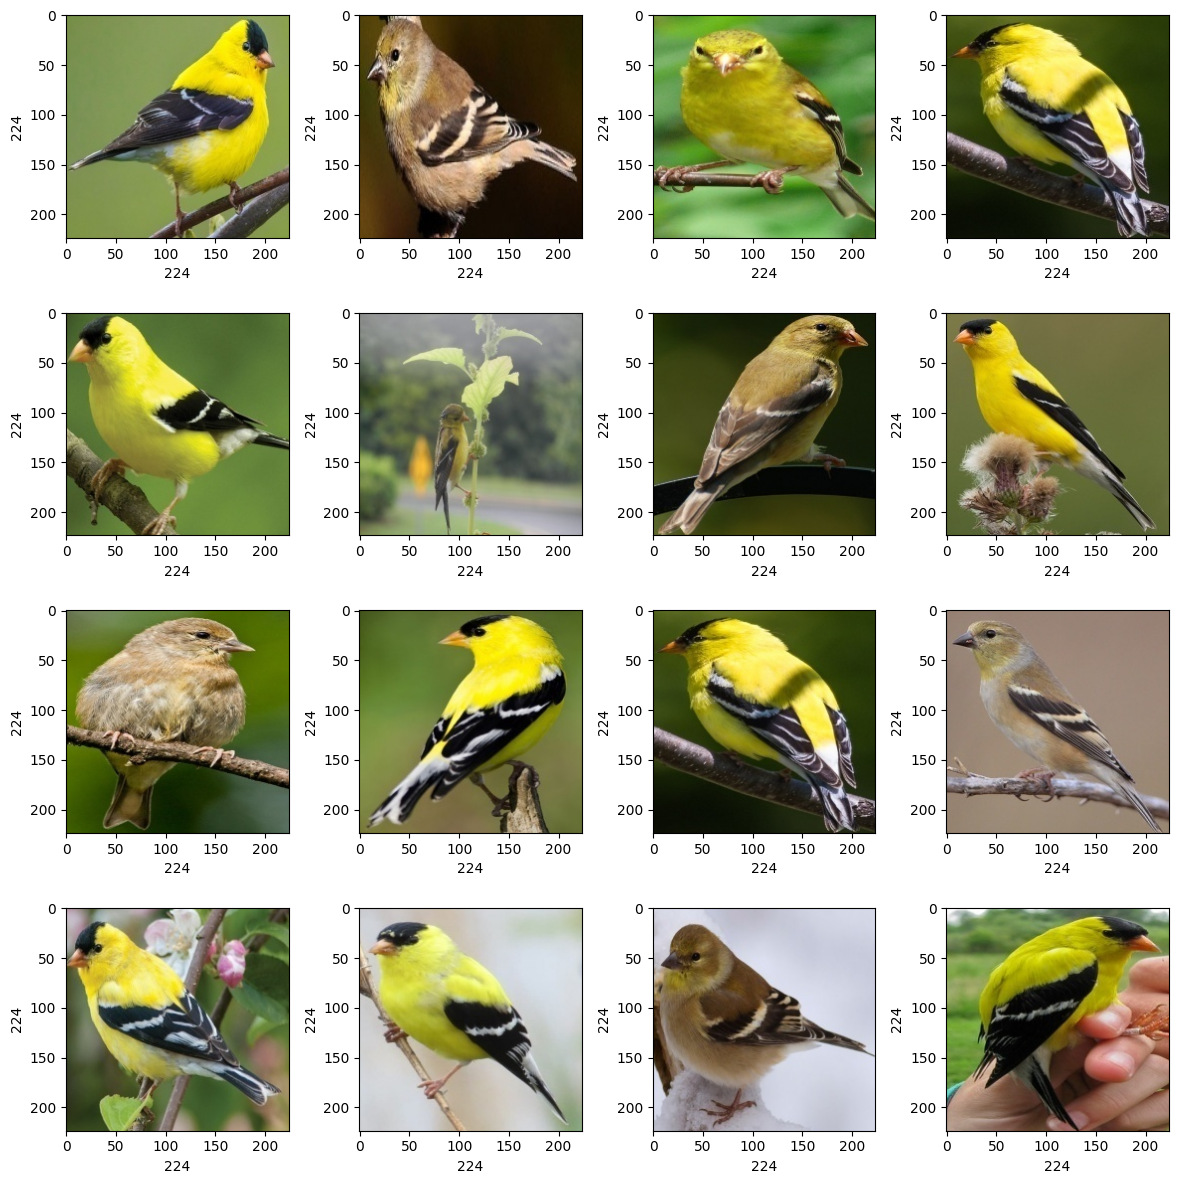

In [4]:
# Plotting 12 images to check dataset
plt.figure(figsize=(12, 12))
path = "/content/drive/MyDrive/Udemy - Data Science Mega-Course_Build {120-Projects In 120-Days}/Project_9 Bird Species Prediction Flask App/Collab Code/Data/Bird Speciees Dataset/AMERICAN GOLDFINCH"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img_path = path + '/' + random.choice(sorted(listdir(path)))
    rand_img = imread(rand_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=10)
    plt.ylabel(rand_img.shape[0], fontsize=10)

In [5]:
# Setting path and creating empty list
dir = "/content/drive/MyDrive/Udemy - Data Science Mega-Course_Build {120-Projects In 120-Days}/Project_9 Bird Species Prediction Flask App/Collab Code/Data/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [6]:
# Reading and converting image to numpy array with preprocessing
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
        preprocessed_image = preprocess_image(image_path)
        image_list.append(preprocessed_image)
        label_list.append(directory)

In [7]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [8]:
# Storing the number of classes
num_classes = len(label_counts)
num_classes

6

In [9]:
# Checking input image shape
image_list[0].shape

(224, 224, 3)

In [10]:
# Checking labels shape
label_list = np.array(label_list)
label_list.shape

(811,)

## Spilt data

In [11]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [12]:
# Convert to numpy arrays
x_train = np.array(x_train)
x_test = np.array(x_test)

In [13]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16)  # No need to divide by 255.0 if preprocess_image already does it
x_test = np.array(x_test, dtype=np.float16)  # No need to divide by 255.0 if preprocess_image already does it
x_train = x_train.reshape(-1, 224, 224, 3)
x_test = x_test.reshape(-1, 224, 224, 3)

In [14]:
# Label binarizing
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [15]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)

In [25]:
# Building model architecture
model = Sequential()
model.add(Conv2D(16, (3, 3), padding="same",input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 74, 74, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 37, 37, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 18, 18, 64)       

In [26]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0003),metrics=['accuracy'])

In [27]:
# Training the model
epochs = 50
batch_size = 64
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
9/9 [==============================] - 4s 137ms/step - loss: 1.7633 - accuracy: 0.2181 - val_loss: 1.5651 - val_accuracy: 0.4077
Epoch 2/50
9/9 [==============================] - 1s 69ms/step - loss: 1.5728 - accuracy: 0.3668 - val_loss: 1.3897 - val_accuracy: 0.4385
Epoch 3/50
9/9 [==============================] - 1s 62ms/step - loss: 1.4574 - accuracy: 0.3938 - val_loss: 1.3619 - val_accuracy: 0.3923
Epoch 4/50
9/9 [==============================] - 1s 60ms/step - loss: 1.3910 - accuracy: 0.4517 - val_loss: 1.2976 - val_accuracy: 0.4923
Epoch 5/50
9/9 [==============================] - 0s 49ms/step - loss: 1.3170 - accuracy: 0.4826 - val_loss: 1.2186 - val_accuracy: 0.5769
Epoch 6/50
9/9 [==============================] - 0s 52ms/step - loss: 1.1704 - accuracy: 0.5772 - val_loss: 1.1046 - val_accuracy: 0.5769
Epoch 7/50
9/9 [==============================] - 1s 58ms/step - loss: 1.1216 - accuracy: 0.5772 - val_loss: 1.0233 - val_accuracy: 0.6077
Epoch 8/50
9/9 [==========

In [34]:
# Saving model
model.save("/content/drive/MyDrive/Udemy - Data Science Mega-Course_Build {120-Projects In 120-Days}/Project_9 Bird Species Prediction Flask App/Bird Species Flask App/app/static/model/bird_species.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluate model

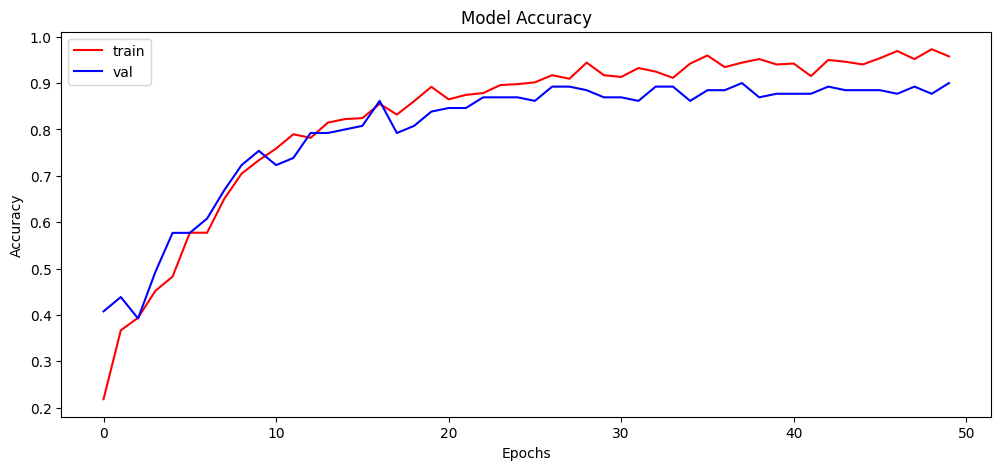

In [29]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

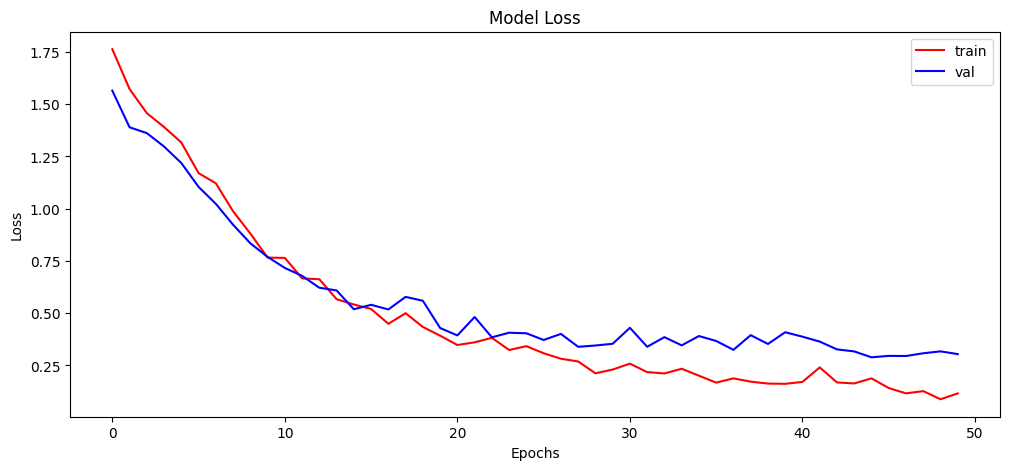

In [28]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [30]:
# Calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 1s 34ms/step - loss: 0.4562 - accuracy: 0.8528
Test Accuracy: 85.27607321739197


## Test

In [31]:
# Storing predictions
y_pred = model.predict(x_test)

6/6 [==============================] - 0s 16ms/step


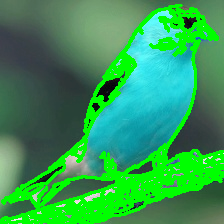

In [32]:
# Plotting image to compare
img = array_to_img(x_test[5])
img

In [33]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[5])])
print("Predicted : ",labels[np.argmax(y_pred[5])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  AMERICAN GOLDFINCH
Predicted :  AMERICAN GOLDFINCH
